# Cancer Prediction Using Machine-Learning Models

===================================================================================================================

**Objective :** 

- This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to **classify whether the breast cancer is benign (B) or malignant (M)**. To achieve this i have used **machine learning classification methods** to fit a function that can predict the discrete class of new input.

===================================================================================================================

- **Structure of the Test :**
1. Importing Dependencies (library & packages)
2. Data Preparation --> (Load And Check Data)
3. Data Exploration & Analysis
4. Data Partitioning & Feature scaling
5. Machine Learning Model Selection & Performance Evaluation
   - Logistic Regression (LR)
   - GradientBoostingClassifier (GB)
   - RandomForestClassifier (RF)
   
- Perform Comparative Analysis of each & every **3 classification algorithms** & then conclude to the best-model.

===================================================================================================================

#### 1. Importing Dependencies [4]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings 
warnings.filterwarnings('ignore') # optional to handle warnings

===================================================================================================================
#### 2. Data preparation (Load & Check Data) [12]

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>2a.</b> Import cancer_data.csv dataset and view first 5 rows? <b>2 marks</b></p>
</div>

In [4]:
df = pd.read_csv("../data/cancer_data.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>2b.</b> Determine the dimension of breast cancer dataset and comment? <b>2 marks</b></p>
</div>

In [5]:
print(f"The dimension of this dataset is: {df.shape}")

The dimension of this dataset is: (569, 33)


We can see that there are 569 rows and 33 columns in this dataset

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <p><b>2c.</b> Check for missing values and comment? <b>2 marks</b></p>
</div>

In [6]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There seems to be no missing values in this dataset besides in the 'Unamed 32' column which has 569 missing values, therefore no imputation for missing values in the other columns is required.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>2d.</b> Drop irrelevant columns, if any, from the breast cancer dataset which can not be used to predict breast cancer? <b>3 marks</b></p>
</div>

In [7]:
df2 = df.drop(['Unnamed: 32'], axis=1)

I have decided to drop the 'Unamed 32' column because out of the other columns, it seems to have multiplle NaN values and doesn't seem like it well contribute to preidcting breast cancer.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>2e.</b> Check for duplicate rows and comment. <b>3 marks</b></p>
</div>

In [8]:
df2.duplicated().sum()

0

There are no duplicates in this dataset, this tell us that this is either a very well kept dataset or it has already been preprocessed

===================================================================================================================
#### 3. Data Exploration & Analysis [34]

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>3a.</b> Rename the 'diagnosis' column to 'label'? <b>11 marks</b></p>
</div>

`diagnosis` is the column which we are going to predict , which says if the cancer is `M = malignant` or `B = benign`.

- i. Rename `diagnosis` to `label`. [2]
- ii. Plot a `countplot` of the label to show counts for each class, include annotations (`chart title` and `x and y-axis titles`).[3]
- iii. Convert `string` expressions to `int` because it will be necessary when training your model. `Malignant = 1` ,`Benign = 0`. [3]
- iv. Confirm number of `malignant` and `benign` cases and comment. [3]

In [9]:
# renaming the title of properties as per need of prediction [2]
df2.rename(columns={'diagnosis': 'label'}, inplace=True)

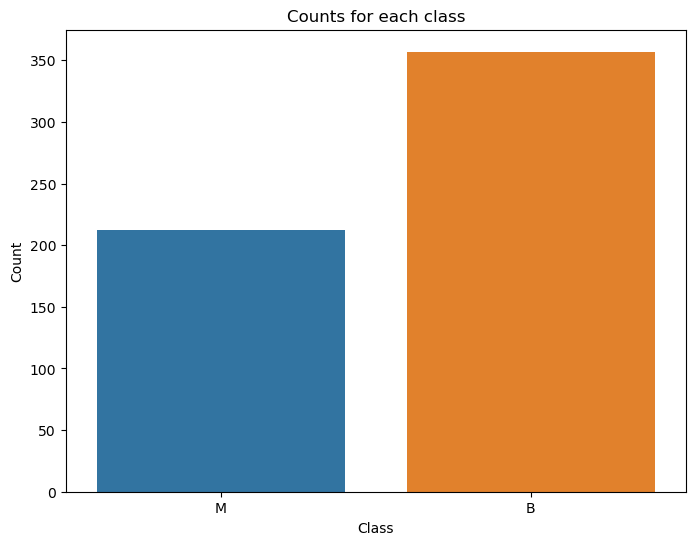

In [10]:
# countplot 

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df2)
plt.title('Counts for each class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Categorical data contain variables with text labels rather than numeric. The number of possible values is often limited to a fixed set. You need to change these into some numeric values to represent the text.

In [11]:
# label encoding 
label_encoder = LabelEncoder()
df2['label'] = label_encoder.fit_transform(df2['label']) 

In [12]:
# confirming counts of respective classes
counts = df2['label'].value_counts()
print("Value Counts:\n", counts)

malignant_cases = counts.get(1, 0)
benign_cases = counts.get(0, 0)

print(f'Malignant cases: {malignant_cases}')
print(f'Benign cases: {benign_cases}')

Value Counts:
 label
0    357
1    212
Name: count, dtype: int64
Malignant cases: 212
Benign cases: 357


As we can see in the value counts mini table, feature 0 has 357 counts and feature 1 has 212 counts which matches the counts we have. (Benign cases is 0 and Maligant cases is 1)

- **Variable/Attribute Description** \
Label--> **(M= malignant , B = Benign)**

> Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)
___
- The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>3b.</b> Compute a 5-number summary of all features against the label. <i>(i.e. min, 25%, 50%, 75%, max only). </i><b>2 marks</b></p>
</div>

In [13]:
df2_summary = df2['label'].describe()
print(df2_summary)

count    569.000000
mean       0.372583
std        0.483918
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: label, dtype: float64


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>3c.</b>  Compute correlation of the entire dataset and observe features with 'corr value' greater than '60%'. <b>4 marks</b></p>
</div>

In [14]:
# correlation matrix 
correlation_matrix = df2.corr()
high_correlation = correlation_matrix[correlation_matrix.abs() > 0.6]
print("Correlation matrix with values greater than 60%:\n", high_correlation)

Correlation matrix with values greater than 60%:
                           id     label  radius_mean  texture_mean  \
id                       1.0       NaN          NaN           NaN   
label                    NaN  1.000000     0.730029           NaN   
radius_mean              NaN  0.730029     1.000000           NaN   
texture_mean             NaN       NaN          NaN      1.000000   
perimeter_mean           NaN  0.742636     0.997855           NaN   
area_mean                NaN  0.708984     0.987357           NaN   
smoothness_mean          NaN       NaN          NaN           NaN   
compactness_mean         NaN       NaN          NaN           NaN   
concavity_mean           NaN  0.696360     0.676764           NaN   
concave points_mean      NaN  0.776614     0.822529           NaN   
symmetry_mean            NaN       NaN          NaN           NaN   
fractal_dimension_mean   NaN       NaN          NaN           NaN   
radius_se                NaN       NaN     0.679090  

Visualization of data is an imperative aspect to understand data and also to explain the data to another person. Python has several interesting visualization libraries that can help an individual to achieve this.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>3d.</b>  Visualize the correlation between features using heatmap. <b>11 marks</b></p>
</div>

> <i>i.</i> Heatmap of all features, include annotations, title and correlation values must be to 2 decimal places. [5]

> <i>ii.</i> Heatmap of all features with 60% corr value and above, include annotations, title and correlation values must be to 2 decimal places. [6]

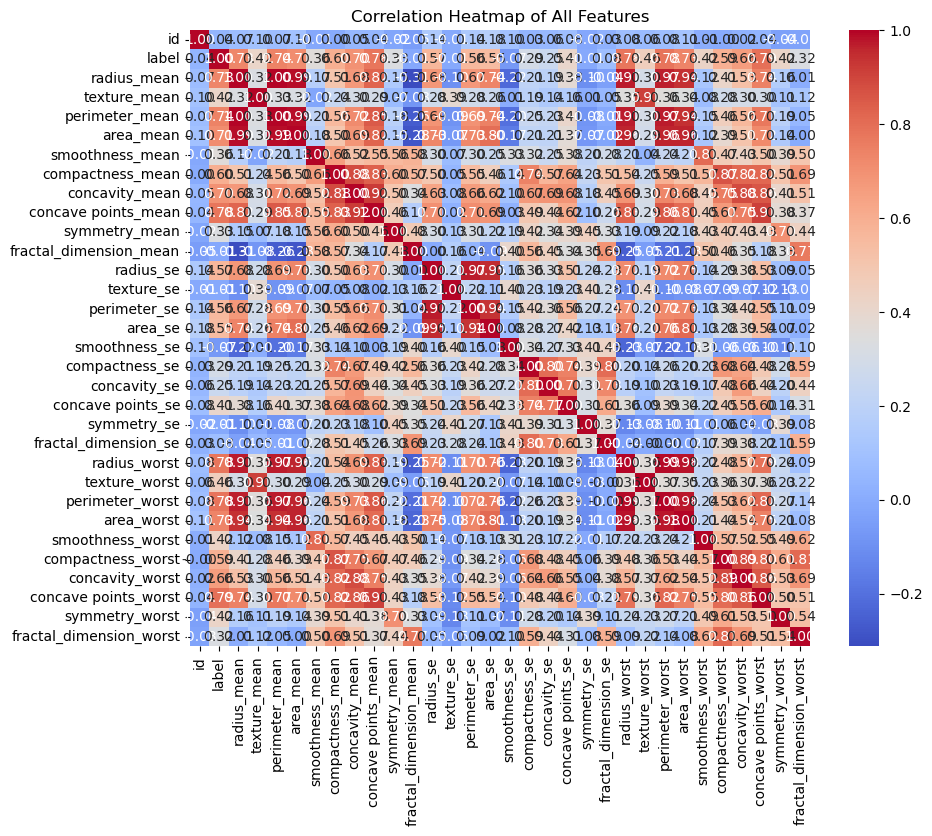

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of All Features')
plt.show()

- First, set a limit value. Here set it to `0.6`. Display features with relationship against the target greater than `|0.6|`.

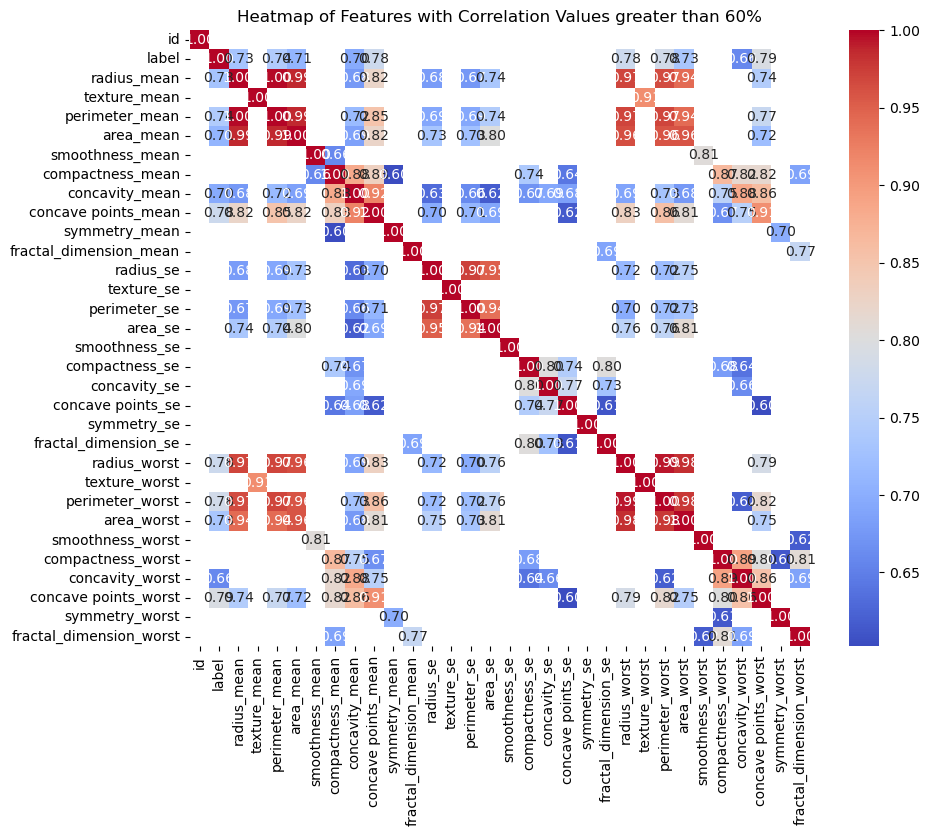

In [16]:
target_corr = correlation_matrix['label'][correlation_matrix['label'].abs() > 0.6]
filtered_corr_matrix = high_correlation.dropna(how='all').dropna(axis=1, how='all')

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Features with Correlation Values greater than 60%')
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>3e.</b>  Use pairplot to visualize features with 60% and higher correlation value against the label. <b>3 marks</b></p>
</div>

- set `diag_kind = "kde"`

- set `hue = "label"`

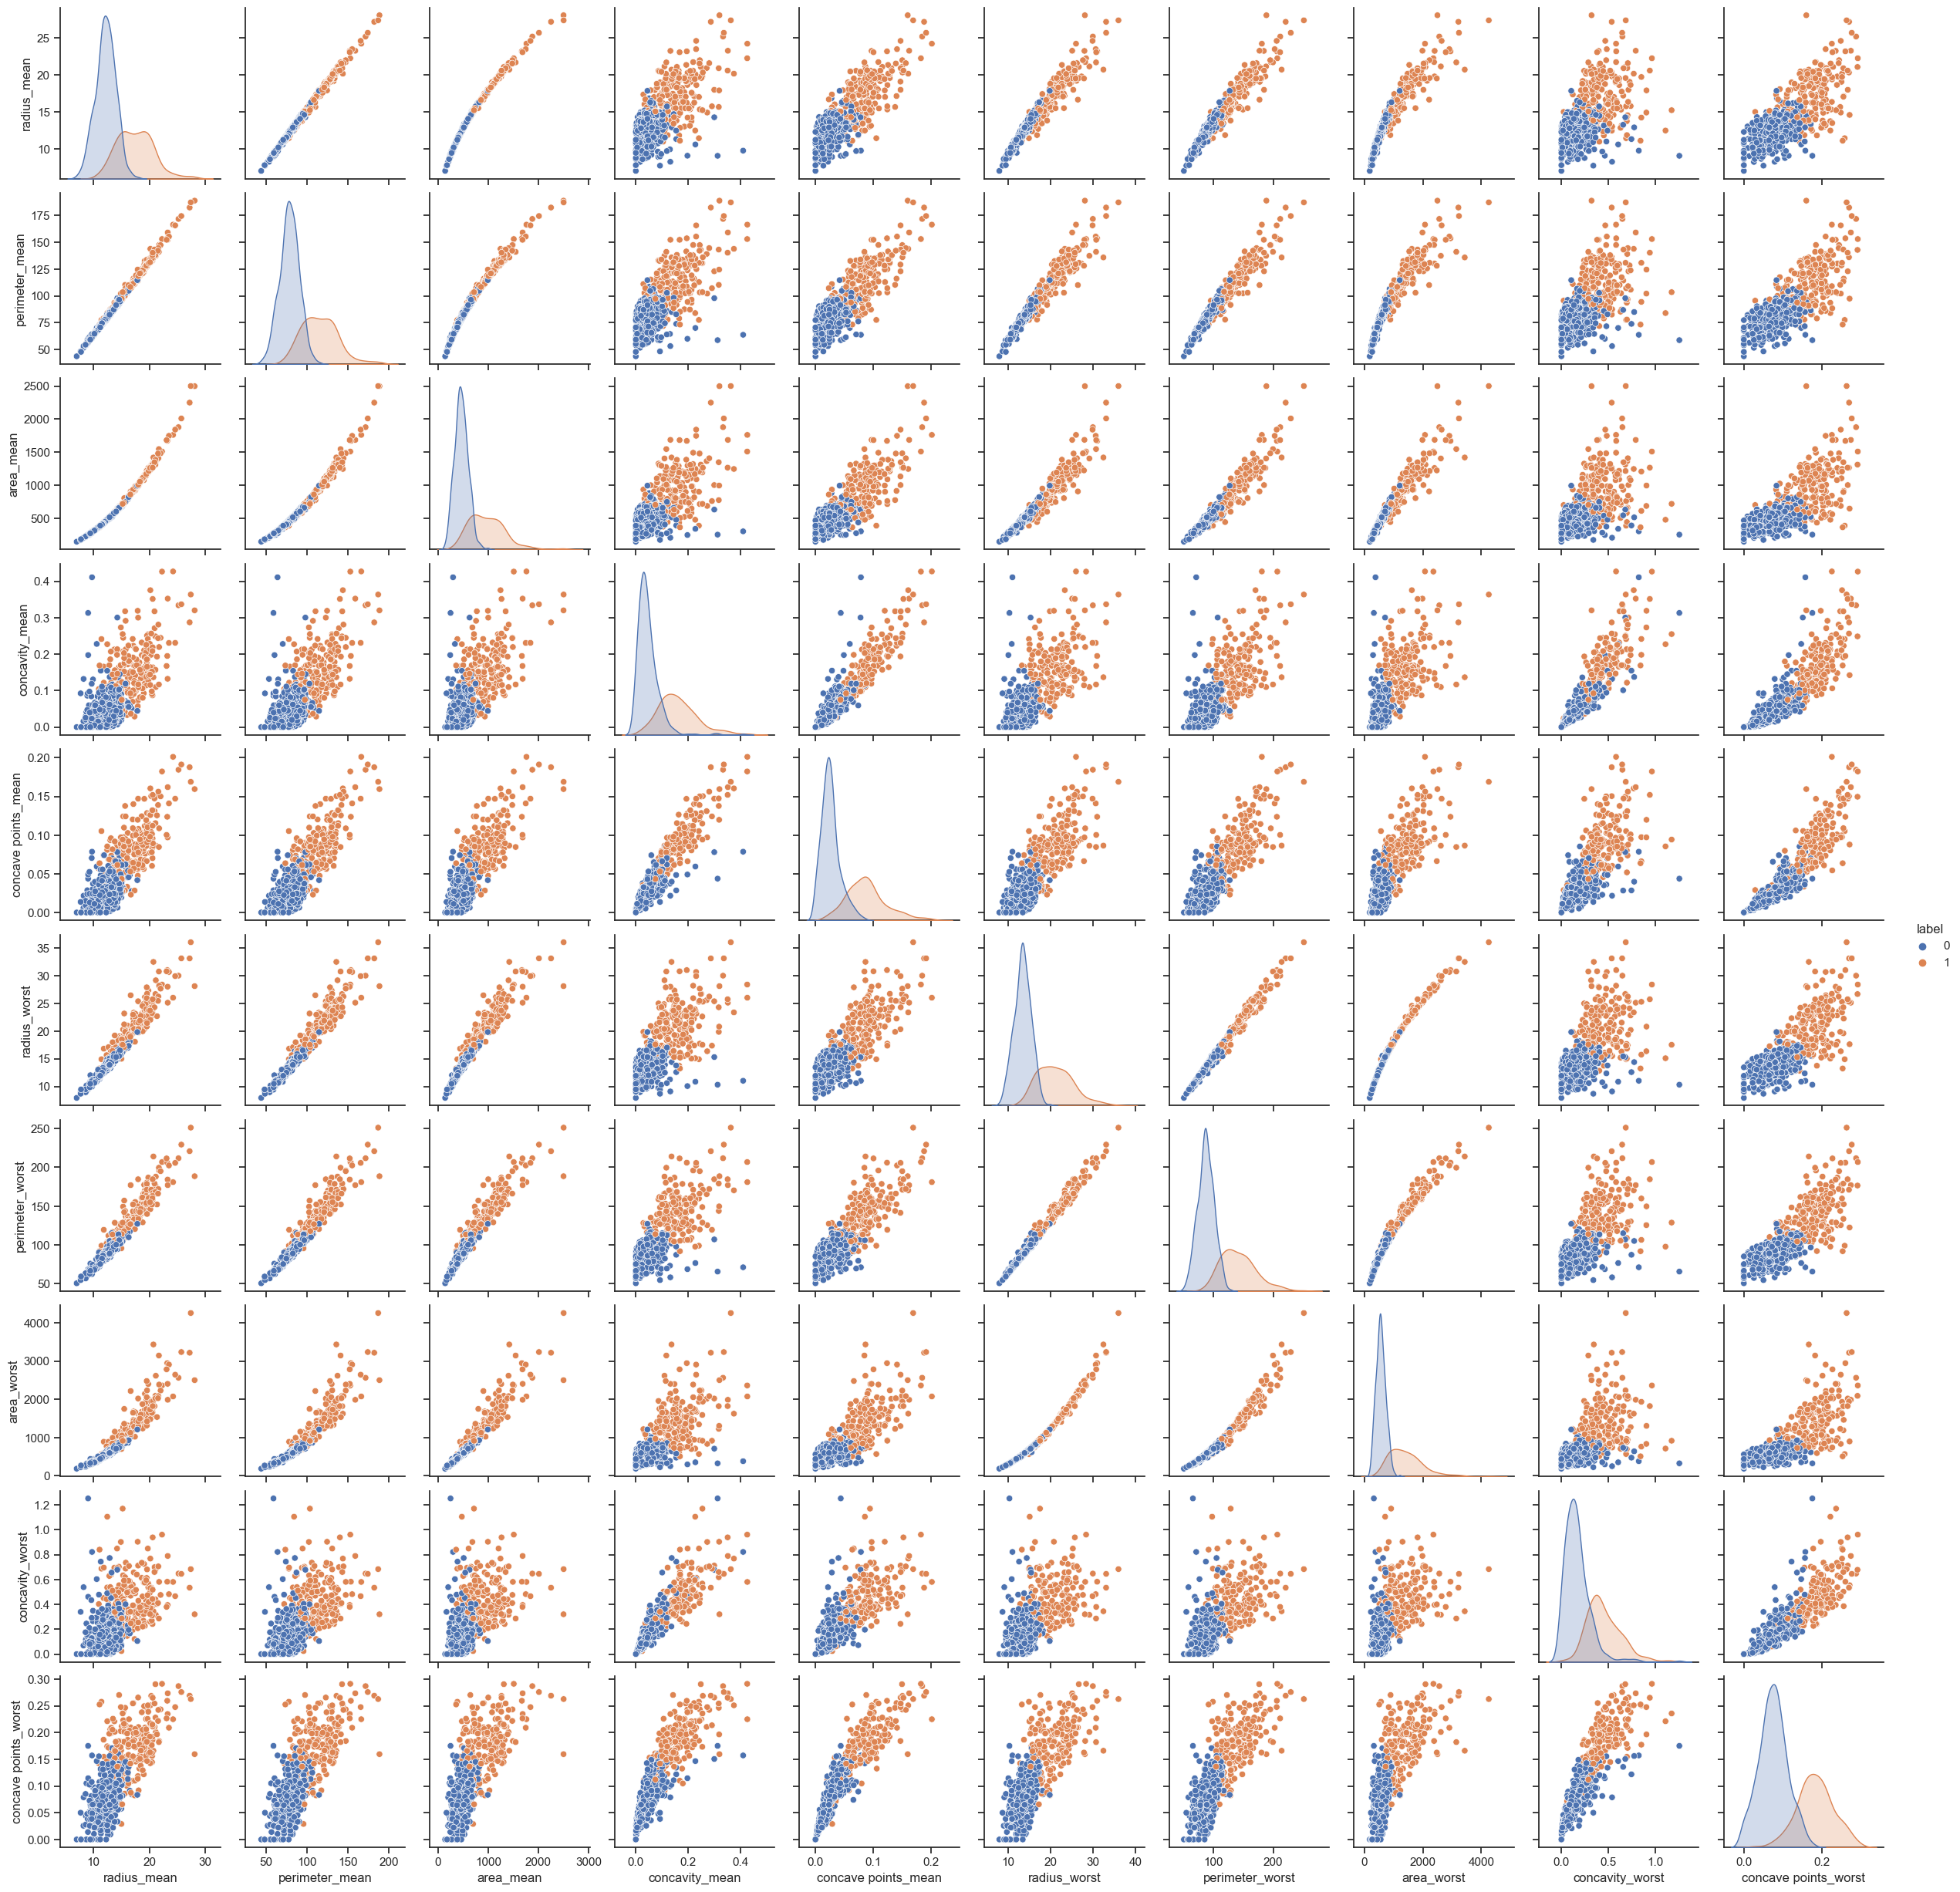

In [17]:
# pairplot for the features with 60% and higher correlation value with the label

high_corr_features = target_corr.index.tolist()
high_corr_features.remove('label') 
df_filtered = df2[['label'] + high_corr_features]

sns.set(style="ticks")
sns.pairplot(df_filtered, diag_kind="kde", hue="label")
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <p><b>3f.</b> Separate features <b>(X)</b> from labels <b>(y)</b> using <b>60%+</b> correlation features. <b>3 marks</b></p>
</div>

In [18]:
X = df_filtered.drop('label', axis=1)
y = df_filtered['label']

===================================================================================================================
#### 4. Data Partitioning and Feature Scaling [10]

- **Splitting the dataset :**
The data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.
We will do this using `SciKit-Learn` library in Python using the `train_test_split` method.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    <p><b>4a.</b> Split the dataset into train and test set using the <b>|60%+|</b> correlation features. <b>6 marks</b></p>
</div>

- Split into 80-20% 
- Check and verify in `percentages` on the shape of the `X_train` and `X_test` sets.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape: X_train:", X_train.shape)
print("Shape: X_test:", X_test.shape)

Shape: X_train: (455, 10)
Shape: X_test: (114, 10)


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>4b.</b>  Scale your features using StandardScaler method. <b>4 marks</b></p>
</div>

We look at the data need for standardization, if there are big differences between the data, standardization is required.

Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Eucledian distance between two data points in their computations. We need to bring all features to the same level of magnitudes. This can be achieved by scaling. This means that you’re transforming your data so that it fits within a specific scale, like `0–100` or `0–1`.
We will use `StandardScaler` method from `Scikit-Learn` library.

In [20]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df2)
scaled_df = pd.DataFrame(scaled_df, columns = df2.columns)

===================================================================================================================
#### 5. Machine Learning Models Selection and Performance Evaluation [24]

This phase is known as Algorithm selection for Predicting the best results.

You are required to train the following models:
- LogisticRegression
- GradientBoostingClassifier
- RandomForestClassifier


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>5a.</b>  Model Fitting. <b>11 marks</b></p>
</div> 

In [21]:
# 1. Train LR model
log_regres = LogisticRegression()
log_regres.fit(X_train, y_train)

# 2. Train GB model 
grad_boost_class = GradientBoostingClassifier()
grad_boost_class.fit(X_train, y_train)

# 3. Train RF model 
rand_forest_class = RandomForestClassifier()
rand_forest_class.fit(X_train, y_train)

RandomForestClassifier()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>5b.</b>  Compute the predictions of the trained models. <b>3 marks</b></p>
</div>

In [22]:
y_lr_train_prediction = log_regres.predict(X_train)
y_lr_test_prediction = log_regres.predict(X_test)

y_boost_train_prediction = grad_boost_class.predict(X_train)
y_boost_test_prediction = grad_boost_class.predict(X_test)

y_forest_train_prediction = rand_forest_class.predict(X_train)
y_forest_test_prediction = rand_forest_class.predict(X_test)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<p><b>5c.</b>Evaluate model performance using Accuracy score, and Confusion Matrix. <b>10 marks</b></p>
</div>

- Accuracy scores for all 3 models and view in a dataframe sorted by `accuracy_score`
- Confusion matrix of the best model based on `accuracy score`

In [23]:
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_lr_test_prediction, y_lr_train_prediction),
    'Gradient Boosting': accuracy_score(y_boost_test_prediction, y_boost_train_prediction),
    'Random Forest': accuracy_score(y_forest_test_prediction, y_forest_test_prediction)
}

accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy Score'])
accuracy_df = accuracy_df.sort_values(by='Accuracy Score', ascending=False)

print("Accuracy Scores for all three models:")
print(accuracy_df)

best_model = accuracy_df.index[0]

# compute confusion matrix 
conf_matrix = confusion_matrix(y_test, eval(f'y_pred_{best_model.replace(" ", "_")}'))
print(f"\nConfusion Matrix of the best model ({best_model}):")
print(conf_matrix)

ValueError: Found input variables with inconsistent numbers of samples: [114, 455]